In [2]:
import os
from ultralytics import  YOLO
def capture_face_from_frame(frame):
    H, W, _ = frame.shape
    model_path = os.path.join('..','models', 'yolov8n-face.pt')

    model = YOLO(model_path)

    threshold = 0.5

    results = model(frame)[0]
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        if score > threshold:
            return frame[int(y1):int(y2), int(x1):int(x2)]
    return None



0: 480x640 1 face, 30.0ms
Speed: 2.8ms preprocess, 30.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


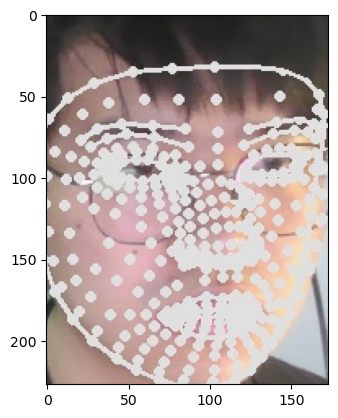

In [4]:
import cv2
import matplotlib.pyplot as plt

result = capture_face_from_frame(cv2.imread('test.jpg'))
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)

In [7]:
import os

from ultralytics import YOLO
import cv2

cap = cv2.VideoCapture(0)
ret, frame = cap.read()

while ret:
    ret, frame = cap.read()
    H, W, _ = frame.shape
    
    model_path = os.path.join('..','models', 'yolov8n-face.pt')
    
    # Load a model
    model = YOLO(model_path)  # load a custom model
    
    threshold = 0.5

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)


    cv2.imshow('frame', frame)
    cv2.waitKey(1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()

cv2.destroyAllWindows()



0: 480x640 (no detections), 10.2ms
Speed: 1.0ms preprocess, 10.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 16.0ms
Speed: 1.0ms preprocess, 16.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 16.1ms
Speed: 1.0ms preprocess, 16.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 9.5ms
Speed: 1.0ms preprocess, 9.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 19.0ms
Speed: 1.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms inf